# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but to make it simple : predicting a continuous (numerical) variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow.keras.utils import plot_model

Note : in order to use plot_model, one must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

### Creating data to view and fit

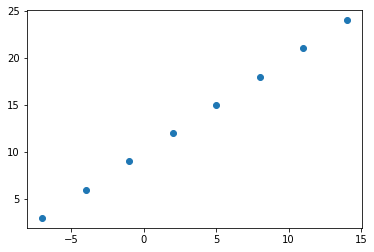

In [4]:
# Create features
X = np.array([-7., -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3., 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X,y)

In [5]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# Turning the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [8]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [9]:
# Expand the dimension of a tensor : https://www.geeksforgeeks.org/python-tensorflow-expand_dims/
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

### Steps in modeling in TensorFlow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the `loss function` (the function which will tells our model how far it's from performing well), the `optimizer` (tells the model how to update its internal patterns to better its predictions) and the `evaluation metrics` (human interpretable values for how well the model is doing).
3. **Fitting the model** - letting the model try to find patterns between features and labels.
4. **Evaluation** - Evaluate the model on the test data (in order to know how reliable are the model's predictions)


In TensorFlow, there are two main way of creating a model :
* Sequential API
* Functional API

In [10]:
# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD : Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 858ms/step - loss: 13.1145 - mae: 13.1145
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 12.9820 - mae: 12.9820
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 12.8495 - mae: 12.8495
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 12.7170 - mae: 12.7170
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 12.5845 - mae: 12.5845


**Note**  
A lot of function in TensorFlow, if they have a shortcut name (e.g. mae or SGD), can be replaced by a string variable to define the fact it is wished to used that specific function. For e.g., the step 2 in the above cell( Compile the model), can also be written as such : 

model.compile(loss="mae",  
              optimizer="sgd",  
              metrics=["mae"]  
             )

In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Trying to make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 206ms/step


array([[4.8972597]], dtype=float32)

The predicted value (y) should be 27 when X is 17. But we got -13.89, which is pretty far off. This is no surprising because the current MAE of our model is 17.3050, which means : on average, our model predict something that is 17.3050 points off where is should be (MAE).

In [13]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[4.8972597]], dtype=float32)

In [14]:
y_pred + 17.3050

array([[22.20226]], dtype=float32)

The value is still off, our model is performing poorly.   
Now, we need to improve our model.

### Improving our model

We can improve our model by altering the steps we took to create a model.  

1. **Creating a model** - Here, we might :
* add more layers, 
* increase the number of hidden units (also called neurons) within each of th hidden layers, 
* change the activation function of each layer

2. **Compiling the model** - Here, we might :
* change the optimization function,
* or perhaps changes the **learning rate** of the optimization function

3. **Fitting the model** - Here, we might :
* fit the model for more epochs (make it train for longer)
* fit the model on more data (give the model more examples to learn from)

In [15]:
# 1st experiment : add a hidden layer, and more epochs, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 720ms/step - loss: 12.5043 - mae: 12.5043
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9404 - mae: 11.9404
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.3700 - mae: 11.3700
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7886 - mae: 10.7886
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1867 - mae: 10.1867
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5583 - mae: 9.5583
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9108 - mae: 8.9108
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2310 - mae: 8.2310
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5073 - mae: 7.5073
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7324 - mae: 6.7324
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 3.7662 - mae: 3.7662
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7000 - mae: 3.7000
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 3.7448 - mae: 3.7448
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7148 - mae: 3.7148
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7237 - mae: 3.7237
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 3.7250 - mae: 3.7250
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6955 - mae: 3.6955
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 3.7338 - mae: 3.7338
Epoch 97/100
1/1 [==============================] - 0s 8ms/step - loss: 3.6681 - mae: 3.6681
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7409 - mae: 3.7409
Epoch 99/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6768 - ma

The 1st experiment has resulted in a good improvement of the model

In [16]:
# Check how the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 151ms/step


array([[32.378944]], dtype=float32)

In [17]:
# 2nd experiment : buil a larger model, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr = Learning Rate
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=300) # Increasing the number of epochs


Epoch 1/300


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 13.0095 - mae: 13.0095
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 12.9782 - mae: 12.9782
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 12.9469 - mae: 12.9469
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 12.9154 - mae: 12.9154
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 12.8839 - mae: 12.8839
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 12.8524 - mae: 12.8524
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 12.8209 - mae: 12.8209
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 12.7892 - mae: 12.7892
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 12.7575 - mae: 12.7575
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 12.7257 - mae: 12.7257
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss:

1/1 [==============================] - 0s 5ms/step - loss: 10.2023 - mae: 10.2023
Epoch 88/300
1/1 [==============================] - 0s 7ms/step - loss: 10.1724 - mae: 10.1724
Epoch 89/300
1/1 [==============================] - 0s 7ms/step - loss: 10.1423 - mae: 10.1423
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 10.1119 - mae: 10.1119
Epoch 91/300
1/1 [==============================] - 0s 7ms/step - loss: 10.0812 - mae: 10.0812
Epoch 92/300
1/1 [==============================] - 0s 7ms/step - loss: 10.0502 - mae: 10.0502
Epoch 93/300
1/1 [==============================] - 0s 6ms/step - loss: 10.0189 - mae: 10.0189
Epoch 94/300
1/1 [==============================] - 0s 7ms/step - loss: 9.9873 - mae: 9.9873
Epoch 95/300
1/1 [==============================] - 0s 7ms/step - loss: 9.9554 - mae: 9.9554
Epoch 96/300
1/1 [==============================] - 0s 7ms/step - loss: 9.9232 - mae: 9.9232
Epoch 97/300
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 6.3379 - mae: 6.3379
Epoch 175/300
1/1 [==============================] - 0s 6ms/step - loss: 6.2744 - mae: 6.2744
Epoch 176/300
1/1 [==============================] - 0s 8ms/step - loss: 6.2105 - mae: 6.2105
Epoch 177/300
1/1 [==============================] - 0s 7ms/step - loss: 6.1461 - mae: 6.1461
Epoch 178/300
1/1 [==============================] - 0s 47ms/step - loss: 6.0812 - mae: 6.0812
Epoch 179/300
1/1 [==============================] - 0s 7ms/step - loss: 6.0155 - mae: 6.0155
Epoch 180/300
1/1 [==============================] - 0s 8ms/step - loss: 5.9492 - mae: 5.9492
Epoch 181/300
1/1 [==============================] - 0s 8ms/step - loss: 5.8823 - mae: 5.8823
Epoch 182/300
1/1 [==============================] - 0s 9ms/step - loss: 5.8147 - mae: 5.8147
Epoch 183/300
1/1 [==============================] - 0s 8ms/step - loss: 5.7464 - mae: 5.7464
Epoch 184/300
1/1 [==============================] - 0s 7ms/step - loss: 

1/1 [==============================] - 0s 6ms/step - loss: 3.7688 - mae: 3.7688
Epoch 262/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7688 - mae: 3.7688
Epoch 263/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7680 - mae: 3.7680
Epoch 264/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7669 - mae: 3.7669
Epoch 265/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7650 - mae: 3.7650
Epoch 266/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7660 - mae: 3.7660
Epoch 267/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7658 - mae: 3.7658
Epoch 268/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7642 - mae: 3.7642
Epoch 269/300
1/1 [==============================] - 0s 8ms/step - loss: 3.7615 - mae: 3.7615
Epoch 270/300
1/1 [==============================] - 0s 7ms/step - loss: 3.7626 - mae: 3.7626
Epoch 271/300
1/1 [==============================] - 0s 7ms/step - loss: 3

The 2nd model, although more larger, don't provide a better training result compared to the previously built one.

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 196ms/step


array([[32.041046]], dtype=float32)

In [20]:
# 3rd experiment : add a hidden layer, more epochs, and review the learning rate, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 782ms/step - loss: 13.9305 - mae: 13.9305
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0589 - mae: 13.0589
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2049 - mae: 12.2049
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3547 - mae: 11.3547
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5223 - mae: 10.5223
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.9239 - mae: 9.9239
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.3233 - mae: 9.3233
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7026 - mae: 8.7026
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0629 - mae: 8.0629
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4021 - mae: 7.4021
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 6ms/step - loss: 0.3172 - mae: 0.3172
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2724 - mae: 0.2724
Epoch 91/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1961 - mae: 0.1961
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2335 - mae: 0.2335
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1629 - mae: 0.1629
Epoch 94/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1238 - mae: 0.1238
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1595 - mae: 0.1595
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1285 - mae: 0.1285
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1042 - mae: 0.1042
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2394 - mae: 0.2394
Epoch 99/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1706 - ma

The loss is 0.1750; this model should perform really well.

In [21]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 156ms/step


array([[26.300817]], dtype=float32)

The model has predicted 26.918, while the real value is 27. We can conclude that the prediction is pretty well.  
**Observation** : adjusting the learning rate of our model has result in the best improvement so far.

**Model improvement rules** - When improving a model :
* **make many small changes** (experiments) and **test each one**, rather than always doing extremely large changes, because otherwise, if one does too big of a change, he might not be sure what caused the improvement or know improvement of the model.
* **the learning rate is potentially the most important hyper-parameter that can be changed** on a neural networks in order to improve it

## Evaluating a model


In practice, a typical workflow one goes through when buidling neural networks is :    
``` Build a model -> fit it -> evaluate it -> tweak a model -> fit it evaluate it -> tweak a model -> fit it -> evaluate it -> ... ```



When it comes to evaluation, there is one words one should memorize, and remember : **visualize**.

It's a good idea to visualize : 
* `The data` - what data are we working with ? What does it look like ?
* `The model` itself - what does our model look like ?
* `The training` of the model - how does the model perform while it learns ?
* `The predictions` of the model - how do the predictions of the model line up agains the real values ?


Let us dig into these steps here a bit further by working on a little bit of a larger problem.

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
# Make labels for the dataset

y = X + 10   # y = X + 10 is the formula(pattern) we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

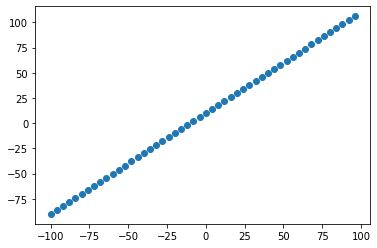

In [25]:
# Visualize the data

plt.scatter(X, y)

### The 03 set of data

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data (it is the above mentionned *tweak the model*), which is typically 10-15% of the total data available.
* **Test set** - the model gets evaluated on this data to test what is has learned (to check how it performs on data is hasn't see before); this set is typically 10-15% of the available data.

In [26]:
# Check how many samples we have
nb_data = len(X)
nb_data

50

In [27]:
# Split the data into train and test sets

X_train = X[: int(nb_data*.8)] # 80% of the data
y_train = y[: int(nb_data*.8)] # 80% of the data

X_test = X[int(nb_data*.8):] # 20% of the data
y_test = y[int(nb_data*.8):] # 20% of the data


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that data was divided in training and testing sets, let's visualize it again.

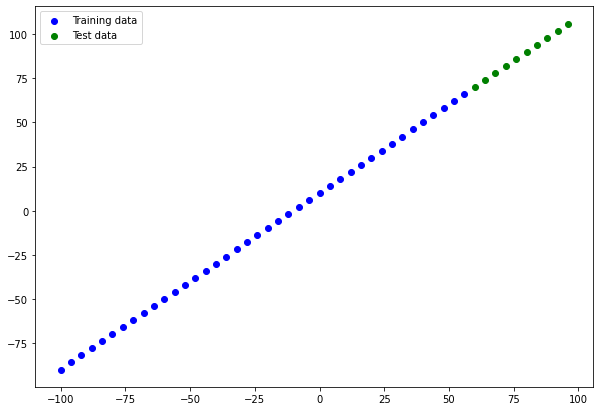

In [28]:
plt.figure( figsize=(10,7) )

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

#Show a legend
plt.legend();

### Building a neural network

In [29]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=["mae"])



#### Visualizing the model

In [30]:
# Get an idea of what the model looks like before running it
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [31]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [32]:
X.ndim

1

In [33]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

* The explanation of the Prof : X[0] contains a scalar, so the input_shape of our model is 1; in case X[0] contain for example 3 different numbers, then input_shape would be 3.    
* My own deduction : Another way to analyze it is based on the number of dimensions of X : X.ndim return 1, which means X is represented on one dimension, so the input shape is 1.

In [34]:
# Let's create a model which builds automatically by 
#    defining the input_shape argument in the first layer (that is what is usually done in practice)

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [X.ndim] ) # tf.keras.layers.Dense(1, input_shape= [1] )
                                                     #     refer to the previous cell to get 
                                                     #      explanations on why input_shape= [1]   
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])




In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


.summary() on a model show the layers it contains, the output shape, and the number of parameters of each layer.   
   
* The **Ouput Shape** here (None, 1) : the representation here is something I personnally need to do more research on
* The **Layer Type** `Dense` : it is another word for `fully connected`. A fully connected layer means each neuron in the said layer connects to all neurons in the next layer.
* There are 2 **Params** :  
 - **Total params** : total number of parameters in the model; these are the patterns that the model is going to learn
 - **Trainable parameters** : these are the parameters (patterns) the model can update as it trains
 - **Non-trainable params** : these are the patterns the model cannot update as it trains; when we import a model that has already learned patterns in data (**transfer learning**), we might freeze those learned patterns so that the model retains what it already knows

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video at http://introtodeeplearning.com/ 

🛠️**Exercise**: Try playing around with the number of hdden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [36]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Let us change the number of neuro from 3 to 1

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 3. Fit the model to the training data for 100 epochs
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 23.7265 - mae: 23.7265
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5902 - mae: 10.5902
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 16.7029 - mae: 16.7029
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9971 - mae: 8.9971
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1063 - mae: 11.1063
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2565 - mae: 10.2565
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2614 - mae: 9.2614
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1768 - mae: 9.1768
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8170 - mae: 11.8170
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 13.7508 - mae: 13.7508
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 5ms/step - loss: 10.4881 - mae: 10.4881
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 6.9798 - mae: 6.9798
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 13.8156 - mae: 13.8156
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 7.8883 - mae: 7.8883
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.4621 - mae: 7.4621
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1685 - mae: 9.1685
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5705 - mae: 8.5705
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5169 - mae: 11.5169
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2886 - mae: 10.2886
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6959 - mae: 7.6959
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 8.6

In [39]:
# Fit the model again, for another 100 epochs (so for a total of 200 epochs)
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8089 - mae: 12.8089
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5426 - mae: 8.5426
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 6.6312 - mae: 6.6312
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1043 - mae: 9.1043
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1214 - mae: 10.1214
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2491 - mae: 9.2491
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.2921 - mae: 8.2921
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1621 - mae: 8.1621
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 14.6423 - mae: 14.6423
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7295 - mae: 11.7295
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss:

2/2 [==============================] - 0s 6ms/step - loss: 10.7264 - mae: 10.7264
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 6.0316 - mae: 6.0316
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9632 - mae: 12.9632
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 6.9048 - mae: 6.9048
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.1122 - mae: 7.1122
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5390 - mae: 8.5390
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 7.8913 - mae: 7.8913
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3013 - mae: 11.3013
Epoch 96/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6161 - mae: 8.6161
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7893 - mae: 12.7893
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 7.4

🔑 Every time model.fit() is called, it's going to fit for the extra epochs provided as parameters : the epochs are cumulative.

### Visualizing a model's layers

In [40]:
# Creating a new model, with 10 units in the hidden layers

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1] )  
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

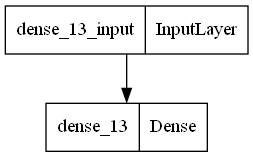

In [42]:
# Looking at the layers of the model
plot_model(model=model)

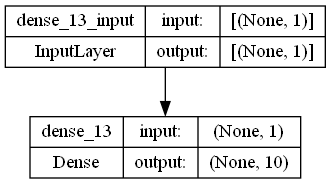

In [43]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

The plot_model() above will be very handy later on when we start creating more complex models with more hidden layers. 
   
Let's observe the plot of a little more complex model

In [44]:
# Creating a model, with 10 units in the hidden layers, and an output layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1], name="input_layer" ), 
    tf.keras.layers.Dense(1, name="output_layer")
], name="amazing_model") 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [46]:
model.summary()

Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


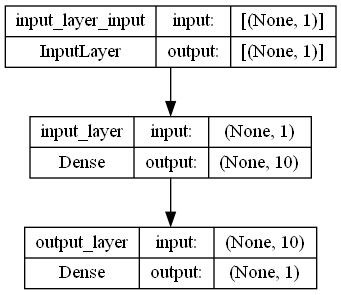

In [47]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions  
  
To visualize predictions, it's a good idea to plot them against the ground truth labels.  
  
Often, one will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions).

In [48]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 100ms/step


array([[ 88.42558 ],
       [ 94.19669 ],
       [ 99.96779 ],
       [105.73889 ],
       [111.509995],
       [117.2811  ],
       [123.0522  ],
       [128.8233  ],
       [134.5944  ],
       [140.36551 ]], dtype=float32)

In [49]:
# Looking at the content of y_test (the real value)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [50]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    predictions=y_pred):
    """
        Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure( figsize=(10,7) )

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    
    # Plot prediction data
    plt.scatter(test_data,predictions,c="r", label="Predictions")

    #Show a legend
    plt.legend() 

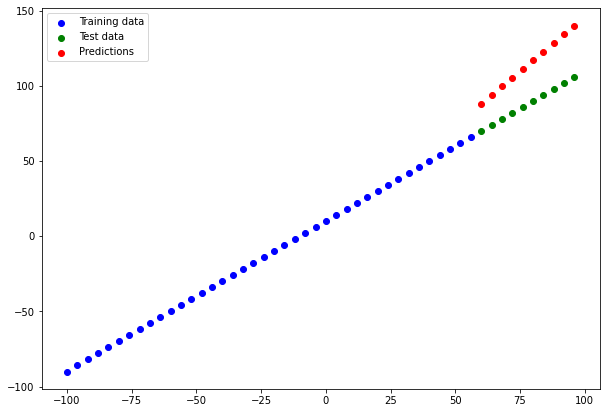

In [51]:
plot_predictions()

Looking at the plots, the model appear to be good since the distance between test data and the predictions is small. But depending on the scale of the plot, that seemingly short distance can in fact represent a fairly large error.   
So the way that can be figured out is by some evaluation metrics.


🛠️ **Exercise** : Try to improve the ploted model performance.

### Evaluation a model's predictions with regression evaluation metrics  
  
The best way to evaluate a model's predictions is by using evaluation metrics. Depending on the problem one is working on, there will be different evaluation metrics to evaluate a model's performance.
   
   
Since the current work is a regression, three of the main metrics are :
* **MAE** - Mean Absolute Error : "On evareage, how wrong is each of the model's predictions ?" . It is a great starter metric for any regression problem.
* **MSE** - Mean Square Error : "Square the average errors" (take the errors from the model predictions, square them, and find the average). It is great to use it when larger errors are more significant than smaller errors.   
* **Huber** : It is a combination of MSE and MAE; it's less sensitive to outliers than MSE.

In [52]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 305ms/step - loss: 26.3955 - mae: 26.3955


[26.395549774169922, 26.395549774169922]

In the evaluation's result above, there are values for `loss` and `mae`. They came from the hyper-parameters (loss and metrics) provided when building the model.

#### Manually calculate the MAE (as an exercise)

In [53]:
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.878677, 13.580673, 17.791113, 23.509995, 29.281097,
       35.0522  , 40.823303, 46.594406, 52.36551 ], dtype=float32)>

The result above does not make sense, because the result should be scalar, not an array . Let us observe y_test and y_pred to understand what is going on in the data.

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [55]:
y_pred

array([[ 88.42558 ],
       [ 94.19669 ],
       [ 99.96779 ],
       [105.73889 ],
       [111.509995],
       [117.2811  ],
       [123.0522  ],
       [128.8233  ],
       [134.5944  ],
       [140.36551 ]], dtype=float32)

In [56]:
y_pred.shape

(10, 1)

y_pred has one more dimension than y_test, so we need to remove its last dimension in order to have the same dimension for the two of them.

In [57]:
# remove the last dimension from y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 88.42558 ,  94.19669 ,  99.96779 , 105.73889 , 111.509995,
       117.2811  , 123.0522  , 128.8233  , 134.5944  , 140.36551 ],
      dtype=float32)>

In [58]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=26.395544>

The MAE manually computed here is the same as the one computed automatically before.

#### Manually calculate the MSE (as an exercise)

In [59]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 132.18112,  170.39902,  275.22797,  446.6683 ,  684.7198 ,
        989.3827 , 1360.6569 , 1798.542  , 2303.0386 , 2874.1467 ],
      dtype=float32)>

We have the same situation as when manually calculing MAE. We will use `tf.squeeze()` to solve the issue.

In [60]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred= tf.squeeze(y_pred) )
mse

<tf.Tensor: shape=(), dtype=float32, numpy=722.6035>

MSE will typically be higher than MAE because, if we look at their formula, there is a square operation in MSE.

#### Define a function for MAE and MSE
It is so that the two of them can be used later

In [61]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred = y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

### Running experiments to improve a model

So far :
* some predictions where made with a trained model, 
* the predictions where compared to test data set, and the comparaison was visualized,
* the predictions where where evaluated with regression evaluation metrics, such as MAE and MSE.

The next question is : "**How do we get the error values lower ?** (How do we minimize the difference between the model's predictions and the test labels)". 

Remembering the workflow discussed before : `Build a model -> fit it -> evaluate it -> tweak it -> fit it -> tweak it -> ... `

If the Machine Learning explorer's motto is `visualize, visualize, visualize`, in other words :
* Visualizing our data
* Visualizing our model
* Visualizing our training
* Visualizing our prediction

Then, the Machine Learning practitioner's motto is `experiment, experiment, experiment, ...`. That is what we are going to do : try to run a few series of experiments to see if we can improve our model following the above mentioned workflow.

Recalling some ways that we can improve our model :
1. **Get more data** - get more examples for your model to train on (in other words, more opportunities to learn patterns/relationships between features and labels).
1. **Make the model larger** (using a more complex model) -  this might come in the form of more layers, or more hidden units in each layer, or both.
1. **Train for longer** - give the model more of a chance to find patterns in the data
1. **Review how the model is compiled** - change the optimization function, or learning rate of the optimization function

In [62]:
# Recalling our dataset
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

The question now is `Looking at our datas, how can we improve our model ?`. Let us review our options :   

1. Get more data ? We can't really get more data unless we just artificially make our datasest bigger, so this option is ruled out.
1. Make the model larger ? Yes we can
1. Train for longer ? Yes, we can
1. Review how the model is compiled ? Yes we can

In regard for this, let's design 03 experiments that we could do: 
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
1. `model_2` - 2 layers, trained for 100 epochs.
1. `model_3` - 2 layers, trained for 500 epochs.

The mindset of a Machine Learning practitioner is to start with a baseline model, and then change one of the parameters for his next experiment, then do the same for the next experiment, and so on.

**Creating model_1**: 1 layer, trained for 100 epochs

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100);

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 18.8412 - mae: 18.8412
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.3321 - mae: 8.3321
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.4541 - mae: 10.4541
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9283 - mae: 12.9283
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9709 - mae: 11.9709
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2610 - mae: 9.2610
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4289 - mae: 8.4289
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0326 - mae: 9.0326
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.3968 - mae: 18.3968
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9171 - mae: 9.9171
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - los

2/2 [==============================] - 0s 5ms/step - loss: 9.9251 - mae: 9.9251
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 7.2477 - mae: 7.2477
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.6838 - mae: 12.6838
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 7.3048 - mae: 7.3048
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6674 - mae: 7.6674
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 7.1141 - mae: 7.1141
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5323 - mae: 12.5323
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 9.9078 - mae: 9.9078
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1400 - mae: 9.1400
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0916 - mae: 12.0916
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 9.054

1/1 [==============================] - 0s 93ms/step


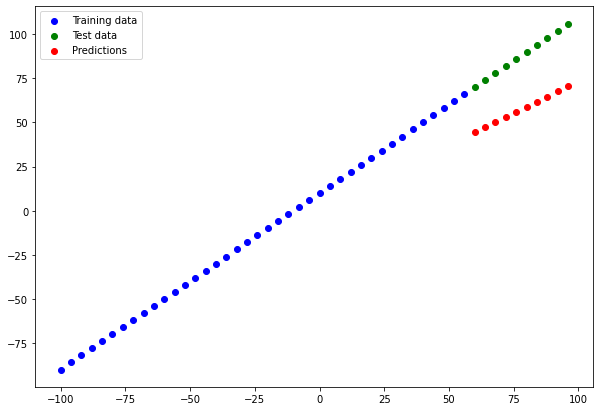

In [64]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test,axis=-1))
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=y_test,predictions=y_preds_1)

In [65]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.55804>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.16394>)

**Creating model_2**: 2 dense layers, trained for 100 epochs

In [66]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # the number of unit (10) here is arbitrary, can be 
                                                                    #   set to anything
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 43.2921 - mse: 2722.1082
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 29.4051 - mse: 1136.2302
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 34.3861 - mse: 1778.8135
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.9410 - mse: 1146.6586
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.2091 - mse: 293.7454
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0863 - mse: 178.4143
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3972 - mse: 157.5995
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1828 - mse: 170.6565
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 41.4764 - mse: 2734.9885
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.7403 - mse: 1166.6187
Epoch 11/100
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 21.3473 - mse: 654.5048
Epoch 87/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0675 - mse: 148.6059
Epoch 88/100
2/2 [==============================] - 0s 5ms/step - loss: 25.2211 - mse: 905.4618
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3939 - mse: 136.1537
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 17.4774 - mse: 438.3699
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8425 - mse: 160.5878
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1659 - mse: 506.5380
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 8.3514 - mse: 102.2332
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 11.5964 - mse: 180.5204
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 26.2109 - mse: 1043.2969
Epoch 96/100
2/2 [==============================] - 0s

In [67]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>

1/1 [==============================] - 0s 103ms/step


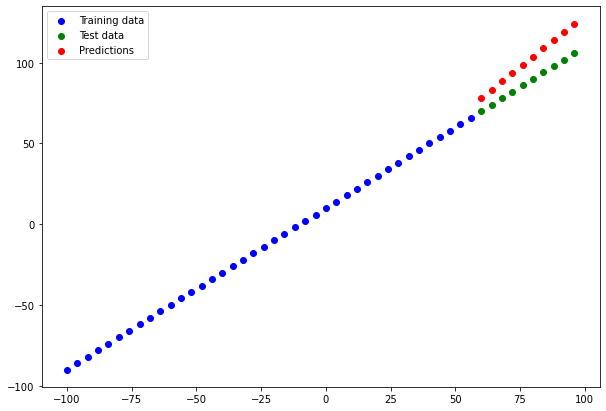

In [68]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2) #train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=y_test,

Our red dots (predictions) are a lot closer to the green dots (test label). This model is much better than the previous one.

In [69]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.310046>,
 <tf.Tensor: shape=(), dtype=float32, numpy=187.24382>)

In [70]:
# Let's compare the above metrics with mae_1 & mse_1
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.55804>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.16394>)

We can confirm that model_2 is doing much better than model_1

**Build `model_3`** - 2 layers, trained for 500 epochs   

The only thing we will change here, compared to model_2, is the number of epochs.

In [71]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 21.6562 - mae: 21.6562
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 21.9205 - mae: 21.9205
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 28.4635 - mae: 28.4635
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 21.9731 - mae: 21.9731
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 13.2235 - mae: 13.2235
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 10.6622 - mae: 10.6622
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.5983 - mae: 11.5983
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 10.7113 - mae: 10.7113
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 35.7704 - mae: 35.7704
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 23.7074 - mae: 23.7074
Epoch 11/500
2/2 [==============================] - 0s 7ms/

2/2 [==============================] - 0s 4ms/step - loss: 11.0583 - mae: 11.0583
Epoch 88/500
2/2 [==============================] - 0s 5ms/step - loss: 25.1609 - mae: 25.1609
Epoch 89/500
2/2 [==============================] - 0s 4ms/step - loss: 9.3852 - mae: 9.3852
Epoch 90/500
2/2 [==============================] - 0s 6ms/step - loss: 17.4313 - mae: 17.4313
Epoch 91/500
2/2 [==============================] - 0s 5ms/step - loss: 10.8285 - mae: 10.8285
Epoch 92/500
2/2 [==============================] - 0s 6ms/step - loss: 19.1118 - mae: 19.1118
Epoch 93/500
2/2 [==============================] - 0s 3ms/step - loss: 8.3391 - mae: 8.3391
Epoch 94/500
2/2 [==============================] - 0s 5ms/step - loss: 11.5807 - mae: 11.5807
Epoch 95/500
2/2 [==============================] - 0s 6ms/step - loss: 26.1349 - mae: 26.1349
Epoch 96/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2074 - mae: 11.2074
Epoch 97/500
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 16.7704 - mae: 16.7704
Epoch 174/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2090 - mae: 11.2090
Epoch 175/500
2/2 [==============================] - 0s 3ms/step - loss: 27.5160 - mae: 27.5160
Epoch 176/500
2/2 [==============================] - 0s 5ms/step - loss: 8.3891 - mae: 8.3891
Epoch 177/500
2/2 [==============================] - 0s 4ms/step - loss: 9.3617 - mae: 9.3617
Epoch 178/500
2/2 [==============================] - 0s 5ms/step - loss: 18.3499 - mae: 18.3499
Epoch 179/500
2/2 [==============================] - 0s 6ms/step - loss: 10.5218 - mae: 10.5218
Epoch 180/500
2/2 [==============================] - 0s 6ms/step - loss: 7.9766 - mae: 7.9766
Epoch 181/500
2/2 [==============================] - 0s 7ms/step - loss: 17.5498 - mae: 17.5498
Epoch 182/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1182 - mae: 11.1182
Epoch 183/500
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 5.8488 - mae: 5.8488
Epoch 259/500
2/2 [==============================] - 0s 5ms/step - loss: 14.8513 - mae: 14.8513
Epoch 260/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9946 - mae: 14.9946
Epoch 261/500
2/2 [==============================] - 0s 4ms/step - loss: 17.4908 - mae: 17.4908
Epoch 262/500
2/2 [==============================] - 0s 5ms/step - loss: 15.5348 - mae: 15.5348
Epoch 263/500
2/2 [==============================] - 0s 6ms/step - loss: 10.1082 - mae: 10.1082
Epoch 264/500
2/2 [==============================] - 0s 6ms/step - loss: 20.2374 - mae: 20.2374
Epoch 265/500
2/2 [==============================] - 0s 5ms/step - loss: 9.7284 - mae: 9.7284
Epoch 266/500
2/2 [==============================] - 0s 5ms/step - loss: 7.8254 - mae: 7.8254
Epoch 267/500
2/2 [==============================] - 0s 4ms/step - loss: 7.5998 - mae: 7.5998
Epoch 268/500
2/2 [==============================] - 0s 5ms/st

2/2 [==============================] - 0s 6ms/step - loss: 10.6064 - mae: 10.6064
Epoch 345/500
2/2 [==============================] - 0s 5ms/step - loss: 30.8295 - mae: 30.8295
Epoch 346/500
2/2 [==============================] - 0s 4ms/step - loss: 10.5560 - mae: 10.5560
Epoch 347/500
2/2 [==============================] - 0s 5ms/step - loss: 25.4178 - mae: 25.4178
Epoch 348/500
2/2 [==============================] - 0s 5ms/step - loss: 13.6075 - mae: 13.6075
Epoch 349/500
2/2 [==============================] - 0s 5ms/step - loss: 12.8784 - mae: 12.8784
Epoch 350/500
2/2 [==============================] - 0s 4ms/step - loss: 15.3261 - mae: 15.3261
Epoch 351/500
2/2 [==============================] - 0s 4ms/step - loss: 32.7932 - mae: 32.7932
Epoch 352/500
2/2 [==============================] - 0s 5ms/step - loss: 13.9478 - mae: 13.9478
Epoch 353/500
2/2 [==============================] - 0s 5ms/step - loss: 17.5997 - mae: 17.5997
Epoch 354/500
2/2 [==============================] - 0

Epoch 430/500
2/2 [==============================] - 0s 4ms/step - loss: 11.8646 - mae: 11.8646
Epoch 431/500
2/2 [==============================] - 0s 5ms/step - loss: 8.4531 - mae: 8.4531
Epoch 432/500
2/2 [==============================] - 0s 7ms/step - loss: 18.6090 - mae: 18.6090
Epoch 433/500
2/2 [==============================] - 0s 6ms/step - loss: 10.0823 - mae: 10.0823
Epoch 434/500
2/2 [==============================] - 0s 9ms/step - loss: 30.6484 - mae: 30.6484
Epoch 435/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1104 - mae: 11.1104
Epoch 436/500
2/2 [==============================] - 0s 9ms/step - loss: 28.7335 - mae: 28.7335
Epoch 437/500
2/2 [==============================] - 0s 6ms/step - loss: 7.9356 - mae: 7.9356
Epoch 438/500
2/2 [==============================] - 0s 6ms/step - loss: 12.7686 - mae: 12.7686
Epoch 439/500
2/2 [==============================] - 0s 6ms/step - loss: 33.8835 - mae: 33.8835
Epoch 440/500
2/2 [=========================

1/1 [==============================] - 0s 112ms/step


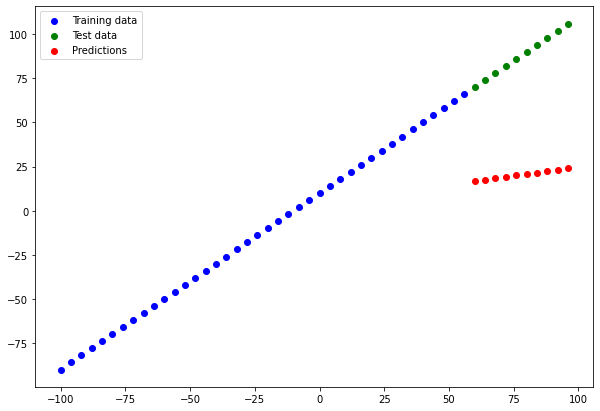

In [72]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

This model is even worse than the first model.
The reason for such a bad result should be that our model was trained for too long (500 epochs), so it is overfitting (this is a very important concept in Machine Learning, but we will not be cover it in this lesson).    
This is a prime example of tweaking some hyper-parameters, even ones that you intuitively think should result in a better result, actually lead to a poor result.

In [73]:
# model_3 evaluation metrics
mae_3 = mae(X_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=57.62191>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4656.7354>)

🔑**Note** : It is good practice to start by small experiments (small models) and make sure they work, and then increase their scale when necessary.

### Comparing the results of our modelling experiments

In [74]:
# Let's compare the result of our models using a dataframe

model_results = [["model_1", mae_1, mse_1], 
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
# model_results = {
#     "model_1": [ mae_1, mse_1],
#     "model_2": [mae_2, mse_2],
#     "model_3": [mae_3, mse_3],
# }

results_df = pd.DataFrame(model_results, columns=["model","MAE","MSE"])
results_df

,model,MAE,MSE
0,model_1,"tf.Tensor(30.55804, shape=(), dtype=float32)","tf.Tensor(944.16394, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(13.310046, shape=(), dtype=float32)","tf.Tensor(187.24382, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(57.62191, shape=(), dtype=float32)","tf.Tensor(4656.7354, shape=(), dtype=float32)"


This result is not easily readable. So we will get the numpy value of the MAEs and MSEs

In [75]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

results_df = pd.DataFrame(model_results, columns=["model","MAE","MSE"])
results_df

,model,MAE,MSE
0,model_1,30.558041,944.163940
1,model_2,13.310046,187.243820
2,model_3,57.621910,4656.735352


From the content of our dataframe, we can observe that model_2 perform the best. So we will look at its content.

In [76]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Notes** :
> * One of our main goal should be to minimize the time between each experiment (so that we don't have to wait, say, 10min before runing the next modelling experiment). 
> * The more experiments ones does, the more things one will figure out which don't work, and in turn get closer to figure out what does work : it is a lot of trials and errors. Remember the ML practionner motto : experiment, experiment, experiment.

### Tracking modelling experiments

One good habit in ML modelling is to tracks experiments results.    

Introducing tools that can help track results of experiments :
* [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments.
* [**Weights & Biases**](https://wandb.ai/site) - a tool for tracking all kind of ML experiments; it can be plugged into TensorBoard. 

TensorBoard's usage will be covered later.

### Save a model      
Saving a model allow us to use it outside our notebook in place such as a web/mobile application.                  
There are two main format we can save our model to :
* SaveModel format : it is used when the saved model will only be used in the TensorFlow environement      
* HDF5 format : it used when the saved model will be used outside of TensorFlow environement

In [77]:
# Save a model using SaveModel format
model_2.save("./saved-models/model_2_SaveModel_format")

INFO:tensorflow:Assets written to: ./saved-models/model_2_SaveModel_format\assets


In [78]:
# Save model using HDF5 format
model_2.save("./saved-models/model_2_HDF5_format.h5")

### Load a saved model   



In [79]:
# Recall the structure of our saved model
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Load the SaveModel format model
loaded_SaveModel_format = tf.keras.models.load_model("./saved-models/model_2_SaveModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


We can confirm that loaded_SaveModel_format has the same structure as model_2, by looking at their .summary().      
Now we will also confirm that their patterns (weights and biases) are the same, by checking that they are doing the same predictions.

In [81]:
# Compare model_2 predictions with loaded_SaveModel_format predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)

model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 113ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [82]:
# Load the HDF5 format model
loaded_h5_model = tf.keras.models.load_model("./saved-models/model_2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


We can confirm through .summary() that the architecture of loaded_h5_model is the same as model_2. 

Now we will make sure that model_2 predictions match loaded_h5_model predictions.

In [83]:
# Compare model_2 predictions with loaded_h5_model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 105ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Puttting together what was learned so far

Now it is time to build a model for a more feature rich dataset.

### Preparing the dataset

We are going to have a look at the publicly available [Medical Cost Personal Datasets - Insurance Forecast by using Linear Regression](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle

**Columns**

* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance     

The dataset can be download from [here](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)          


The goal is to use the above columns from age to region to predict what someone's medical costs billed by health insurance will be.

In [84]:
insurance_df = pd.read_csv("data/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
insurance_df.shape

(1338, 7)

In [86]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Now we will work on our first step in getting our data ready to pass into our machine/deep learning models : all our categorical features should be encoded to numerical values. Here, it is the one-hot encoding technique that will be used.  

We can one-hot encode our variables manually, but it will take a lot of work. So we will use the `pandas.get_dummies()` function. Here is [an example](https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example) on how to proceed.

In [90]:
# One-hot encode dataframe so that it is all numbers
insurance_onehot_df = pd.get_dummies(insurance_df)
insurance_onehot_df.T

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19.000,18.0000,28.000,33.00000,32.0000,31.0000,46.0000,37.0000,37.0000,60.00000,...,23.00000,52.000,57.0000,23.00000,52.000,50.0000,18.0000,18.0000,21.000,61.0000
bmi,27.900,33.7700,33.000,22.70500,28.8800,25.7400,33.4400,27.7400,29.8300,25.84000,...,24.22500,38.600,25.7400,33.40000,44.700,30.9700,31.9200,36.8500,25.800,29.0700
children,0.000,1.0000,3.000,0.00000,0.0000,0.0000,1.0000,3.0000,2.0000,0.00000,...,2.00000,2.000,2.0000,0.00000,3.000,3.0000,0.0000,0.0000,0.000,0.0000
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,6406.4107,28923.13692,...,22395.74424,10325.206,12629.1656,10795.93733,11411.685,10600.5483,2205.9808,1629.8335,2007.945,29141.3603
sex_female,1.000,0.0000,0.000,0.00000,0.0000,1.0000,1.0000,1.0000,0.0000,1.00000,...,1.00000,0.000,1.0000,1.00000,1.000,0.0000,1.0000,1.0000,1.000,1.0000
sex_male,0.000,1.0000,1.000,1.00000,1.0000,0.0000,0.0000,0.0000,1.0000,0.00000,...,0.00000,1.000,0.0000,0.00000,0.000,1.0000,0.0000,0.0000,0.000,0.0000
smoker_no,0.000,1.0000,1.000,1.00000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00000,...,1.00000,1.000,1.0000,1.00000,1.000,1.0000,1.0000,1.0000,1.000,0.0000
smoker_yes,1.000,0.0000,0.000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,...,0.00000,0.000,0.0000,0.00000,0.000,0.0000,0.0000,0.0000,0.000,1.0000
region_northeast,0.000,0.0000,0.000,0.00000,0.0000,0.0000,0.0000,0.0000,1.0000,0.00000,...,1.00000,0.000,0.0000,0.00000,0.000,0.0000,1.0000,0.0000,0.000,0.0000
region_northwest,0.000,0.0000,0.000,1.00000,1.0000,0.0000,0.0000,1.0000,0.0000,1.00000,...,0.00000,0.000,0.0000,0.00000,0.000,1.0000,0.0000,0.0000,0.000,1.0000


### Building the regression model